# Insurance Claim Prediction

## 1.0 Introduction

### 1.1 Business Understanding / Project Objective

In this project, we assume the role of a Lead Data Analyst whose objective is to build a predictive model to determine if a building will have an insurance claim during a certain period or not. 
We are required to predict the probability of having at least one claim over the insured period of the building. The model will be based on the building characteristics. The target variable, Claim, is a:
- 1 if the building has at least a claim over the insured period.
- 0 if the building doesn’t have a claim over the insured period.

### 1.2 Data Understanding

The dataset contains 13 characteristic columns and 1 target column. The columns in the dataset are described below:

- *Customer Id*: Identification number for the Policy holder
- *YearOfObservation*: year of observation for the insured policy
- *Insured_Period*: duration of insurance policy in Olusola Insurance. (Ex*: Full year insurance, Policy Duration = 1; 6 months = 0.5
- *Residential*: is the building a residential building or not
- *Building_Painted*: is the building painted or not (N-Painted, V-Not Painted)
- *Building_Fenced*: is the building fenced or not (N-Fenced, V-Not Fenced)
- *Garden*: building has garden or not (V-has garden; O-no garden)
- *Settlement*: Area where the building is located. (R- *rural area; U- *urban area)
- *Building Dimension*: Size of the insured building in m2
- *Building_Type*: The type of building (Type 1, 2, 3, 4)
- *Date_of_Occupancy*: date building was first occupied
- *NumberOfWindows*: number of windows in the building
- *Geo Code*: Geographical Code of the Insured building
- *Claim*: target variable. (0*: no claim, 1*: at least one claim over insured period).

## 2.0 Toolbox Loading

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Hiding the warnings

# Modelling
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import *
import lightgbm as lgb
from catboost import CatBoostClassifier

# Additional libraries
import os
import pickle


print("Loading complete.", "Warnings hidden.")

Loading complete. Warnings hidden.


In [2]:
# Removing the restriction on columns to display
pd.set_option("display.max_columns", None)

## 3.0 Data Exploration

In [3]:
# Loading the data
dataset = pd.read_csv("data/train_data.csv")
dataset

Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

     Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                   N               V      V          U               290.0   
1                   V               N      O          R               490.0   
2                   N               V      V          U               595.0   
3                   V               V      V          U              2840.0   
4                   V               N      O          R               680.0   
...               ...             ...    ...        ...                 ...   
7155                V               V      V          U                 NaN   
7156                V               V      V          U                 NaN   
7157                V               V      V          U                 NaN   
7158                V               V      V          U                 NaN   
7159                V               V      V          U                 NaN   

      Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  Claim  
0                 1             1960.0               .     1053      0  
1                 1             1850.0               4     1053      0  
2                 1             1960.0               .     1053      0  
3                 1             1960.0               .     1053      0  
4                 1             1800.0               3     1053      0  
...             ...                ...             ...      ...    ...  
7155              1             2001.0               .      NaN      0  
7156              2             1980.0               .      NaN      1  
7157              1             1992.0               .      NaN      0  
7158              1             1972.0               .      NaN      0  
7159              1             2004.0               .      NaN      0  

[7160 rows x 14 columns]

In [4]:
# Drop the "Customer Id" column
dataset.drop(columns="Customer Id", inplace = True)

In [5]:
# Looking at information about the columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7153 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7054 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   6652 non-null   float64
 10  NumberOfWindows     7160 non-null   object 
 11  Geo_Code            7058 non-null   object 
 12  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 727.3+ KB


In [6]:
# Check for missing values
dataset.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [7]:
# Checking for duplicates
dataset[dataset.duplicated()]

YearOfObservation  Insured_Period  Residential Building_Painted  \
881                2012        1.000000            0                N   
1720               2012        1.000000            0                N   
2866               2012        1.000000            0                V   
3332               2012        1.000000            1                V   
4205               2012        1.000000            1                V   
4207               2013        0.523288            1                N   
4433               2014        1.000000            0                V   
5715               2015        1.000000            0                V   
7067               2013        1.000000            0                V   
7070               2012        1.000000            0                V   
7098               2013        1.000000            0                V   
7102               2012        1.000000            1                V   

     Building_Fenced Garden Settlement  Building Dimension  Building_Type  \
881                V      V          U              2208.0              1   
1720               V      V          U              2360.0              1   
2866               N      O          R              4142.0              2   
3332               V      V          U               450.0              2   
4205               N      O          R               999.0              2   
4207               V      V          U               315.0              2   
4433               V      V          U              7100.0              2   
5715               N      O          R              2188.0              2   
7067               V      V          U                 NaN              2   
7070               V      V          U                 NaN              2   
7098               V      V          U                 NaN              2   
7102               V      V          U                 NaN              2   

      Date_of_Occupancy NumberOfWindows Geo_Code  Claim  
881              1980.0               .    13071      1  
1720             1980.0               .    21054      0  
2866             1969.0            >=10    38229      0  
3332             1960.0               .    51454      0  
4205             2008.0               3    66130      0  
4207             1988.0               .    66130      0  
4433             1980.0               .    68278      1  
5715             1974.0               5    83069      0  
7067             1960.0               .      NaN      0  
7070             2008.0               .      NaN      0  
7098             1960.0               .      NaN      0  
7102             1960.0               .      NaN      0

From the dataset preview and the info above, we note the following:
- There are a total of 7160 observations in the dataset
- Four columns have missing values. The missing values for the numeric columns will be filled with their respective medians
- There are no duplicate observations in any of the columns
- There are 6 numeric columns

In [8]:
# Fill the missing values for "Building Dimension"
bd_imputer = SimpleImputer(strategy="median", missing_values= np.NaN)
dataset["Building Dimension"] = bd_imputer.fit_transform(dataset["Building Dimension"].values.reshape(-1,1))[:,0]

In [9]:
# Fill the missing values for "Date of Occupancy"
do_imputer = SimpleImputer(strategy="median")
dataset["Date_of_Occupancy"] = do_imputer.fit_transform(dataset["Date_of_Occupancy"].values.reshape(-1,1))[:,0]

In [10]:
# Fill the missing values for "Garden"
do_imputer = SimpleImputer(strategy="most_frequent")
dataset["Garden"] = do_imputer.fit_transform(dataset["Garden"].values.reshape(-1,1))[:,0]

In [11]:
# Check for missing values
dataset.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  0
Settlement              0
Building Dimension      0
Building_Type           0
Date_of_Occupancy       0
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

### 3.1 Exploration of Numeric Columns

In [12]:
# Check the number of unique values in each column
dataset.nunique()

YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         11
Geo_Code              1307
Claim                    2
dtype: int64

In [13]:
# Looking at the descriptive statistics of the columns with numeric values
numerics = [column for column in dataset.columns if (dataset[column].dtype != "O") & (len(dataset[column].unique()) > 2)]
print("Summary table of the Descriptive Statistics of Columns with Numeric Values")
dataset[numerics].describe().T

Summary table of the Descriptive Statistics of Columns with Numeric Values


count         mean          std     min          25%  \
YearOfObservation   7160.0  2013.669553     1.383769  2012.0  2012.000000   
Insured_Period      7160.0     0.909758     0.239756     0.0     0.997268   
Building Dimension  7160.0  1871.873184  2263.296186     1.0   531.500000   
Building_Type       7160.0     2.186034     0.940632     1.0     2.000000   
Date_of_Occupancy   7160.0  1964.849721    34.730347  1545.0  1960.000000   

                       50%     75%      max  
YearOfObservation   2013.0  2015.0   2016.0  
Insured_Period         1.0     1.0      1.0  
Building Dimension  1083.0  2250.0  20940.0  
Building_Type          2.0     3.0      4.0  
Date_of_Occupancy   1970.0  1980.0   2016.0

In [14]:
# Visualizing the distributions of the columns with numeric values
for column in dataset[numerics].columns:
    if len(dataset[column].unique()) > 2:

        # Visualizing the distribution of categories inside the column
        fig = px.box(dataset[numerics], y=column, labels={"color": "Claim"},
                     title=f"A visual representation of values in the {column} column")
        fig.show()

        # Visualizing the proportion of the species inside the column
        fig = px.box(dataset[numerics], y=column, color=dataset["Claim"], labels={"color": "Claim"},
                     title=f"A visual representation of values in the {column} column split by claim")
        fig.show()

### 3.2 Exploration of Categorical Columns

In [15]:
# Visualizing the distribution of the columns with categorical values and their species
categoricals = [column for column in dataset.columns if (dataset[column].dtype == "O")]

for column in dataset[categoricals].columns:
    # Visualizing the distribution of the categories in the column
    fig = px.histogram(dataset, x=dataset[column], text_auto=True, title=f"Distribution of values in the {column} column")
    fig.show()

In [16]:
# Explore the "number of windows" column
dataset["NumberOfWindows"].value_counts()

   .    3551
4        939
3        844
5        639
2        363
6        306
7        211
8        116
1         75
>=10      67
9         49
Name: NumberOfWindows, dtype: int64

The following will be applied to the values in the "number of windows" column: 
- change the ">=10" value to 10
- fill the nulls with the mode
- convert dtype to int

In [17]:
# Replace the ">=10" values
dataset["NumberOfWindows"].replace(">=10", 10, inplace= True)

In [18]:
# Replace the "   ." values
dataset["NumberOfWindows"].replace("   .", 4, inplace= True)
dataset["NumberOfWindows"] = dataset["NumberOfWindows"].apply(int)

## 4.0 Feature Engineering
### 4.1 Feature Encoding

In [19]:
# Looking at the number of unique values in each column
dataset.nunique()

YearOfObservation        5
Insured_Period         401
Residential              2
Building_Painted         2
Building_Fenced          2
Garden                   2
Settlement               2
Building Dimension    2043
Building_Type            4
Date_of_Occupancy      134
NumberOfWindows         10
Geo_Code              1307
Claim                    2
dtype: int64

- Here, the target column will be encoded using label encoding
- Subject to the number of unique values per column , the categorical columns will be encoded using one-hot encoding
- The numeric columns will be scaled before modelling

In [20]:
# Take another look at the dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7160 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7160 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   7160 non-null   float64
 10  NumberOfWindows     7160 non-null   int64  
 11  Geo_Code            7058 non-null   object 
 12  Claim               7160 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 727.3+ KB


In [21]:
# Drop the Geo_Code column
dataset.drop(columns = "Geo_Code", inplace=True)

In [22]:
# Redefine the list of numeric columns
numerics = [column for column in dataset.columns if (dataset[column].dtype != "O")]

# Drop the Claim column from the numerics list
numerics.remove("Claim")
numerics

['YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building Dimension',
 'Building_Type',
 'Date_of_Occupancy',
 'NumberOfWindows']

In [23]:
# Redefine the list of categorical columns
categoricals = [column for column in dataset.columns if (dataset[column].dtype == "O")]
categoricals

['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

In [24]:
# Encode the categorical columns
encoder = OneHotEncoder(drop = "first", sparse = False)
encoder.fit(dataset[categoricals])

encoded_categoricals = encoder.transform(dataset[categoricals])
encoded_categoricals = pd.DataFrame(encoded_categoricals, columns = encoder.get_feature_names_out().tolist())

# Add the encoded categoricals to the DataFrame and dropping the original columns
dataset = dataset.join(encoded_categoricals)
dataset.drop(columns= categoricals, inplace= True)
dataset

YearOfObservation  Insured_Period  Residential  Building Dimension  \
0                  2013        1.000000            0               290.0   
1                  2015        1.000000            0               490.0   
2                  2014        1.000000            0               595.0   
3                  2013        1.000000            0              2840.0   
4                  2014        1.000000            0               680.0   
...                 ...             ...          ...                 ...   
7155               2012        1.000000            1              1083.0   
7156               2013        1.000000            0              1083.0   
7157               2016        0.038251            0              1083.0   
7158               2013        1.000000            0              1083.0   
7159               2014        1.000000            0              1083.0   

      Building_Type  Date_of_Occupancy  NumberOfWindows  Claim  \
0                 1             1960.0                4      0   
1                 1             1850.0                4      0   
2                 1             1960.0                4      0   
3                 1             1960.0                4      0   
4                 1             1800.0                3      0   
...             ...                ...              ...    ...   
7155              1             2001.0                4      0   
7156              2             1980.0                4      1   
7157              1             1992.0                4      0   
7158              1             1972.0                4      0   
7159              1             2004.0                4      0   

      Building_Painted_V  Building_Fenced_V  Garden_V  Settlement_U  
0                    0.0                1.0       1.0           1.0  
1                    1.0                0.0       0.0           0.0  
2                    0.0                1.0       1.0           1.0  
3                    1.0                1.0       1.0           1.0  
4                    1.0                0.0       0.0           0.0  
...                  ...                ...       ...           ...  
7155                 1.0                1.0       1.0           1.0  
7156                 1.0                1.0       1.0           1.0  
7157                 1.0                1.0       1.0           1.0  
7158                 1.0                1.0       1.0           1.0  
7159                 1.0                1.0       1.0           1.0  

[7160 rows x 12 columns]

### 4.2 Feature Correlation and Selection

In [25]:
# Looking at the correlation between the variables in the merged dataframe
correlation = pd.DataFrame(dataset.corr())

# Defining a colourscale for the correlation plot
colorscale = [[0.0, "rgb(255,255,255)"], [0.2, "rgb(255, 255, 153)"],
              [0.4, "rgb(153, 255, 204)"], [0.6, "rgb(179, 217, 255)"],
              [0.8, "rgb(240, 179, 255)"], [1.0, "rgb(255, 77, 148)"]
              ]

# Plotting the Correlation Matrix
fig = px.imshow(correlation,
                text_auto=".3f",
                aspect="auto",
                labels={"color": "Correlation Coefficient"},
                contrast_rescaling="minmax",
                color_continuous_scale=colorscale
                )
fig.update_xaxes(side="top")
fig.show()

## 5.0 Modelling

**Preview**
- Train_test_split: Modelling will be done normally with a basic train_test_split. The selected model will then be cross-validated and fine-tuned before completion.
- Balancing: the dataset will be checked for imbalance, and actions taken thereof

In [26]:
# Check for imbalance
dataset["Claim"].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

In [27]:
# Defining the target & predictor variables
X = dataset.drop(columns=["Claim"])
y = dataset["Claim"]

In [28]:
# Resample the training dataframe using SMOTE
smote = SMOTE(sampling_strategy="minority", n_jobs=-1, random_state=24)
X, y = smote.fit_resample(X, y)
y.value_counts()

0    5526
1    5526
Name: Claim, dtype: int64

In [29]:
# Splitting the dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)
y_train.value_counts()

1    3868
0    3868
Name: Claim, dtype: int64

In [30]:
# Scale the numeric columns
scaler = MinMaxScaler()
X_train[numerics] = scaler.fit_transform(X_train[numerics])
X_test[numerics] = scaler.transform(X_test[numerics])

In [31]:
# Define the models
log_reg_model = LogisticRegression(random_state=24)
dt_model = DecisionTreeClassifier(random_state=24)
rf_model = RandomForestClassifier(random_state=24)
xgb_model = XGBClassifier(random_state=24)
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
lgb_model = lgb.LGBMClassifier(random_state=24)

# Create a dictionary of the models
smote_models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catb_model,
    "LightGBM": lgb_model
}

In [32]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, y_train= y_train, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")
        
        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        print("\n")

        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")
        
        print(f"{name} AUC score: {roc_auc_score(y_test, y_pred)}")

        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc","f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.71      0.67      1658
           1       0.68      0.61      0.64      1658

    accuracy                           0.66      3316
   macro avg       0.66      0.66      0.66      3316
weighted avg       0.66      0.66      0.66      3316
 

Logistic Regressor Confusion Matrix: 
       0     1
0  1175   483
1   654  1004 



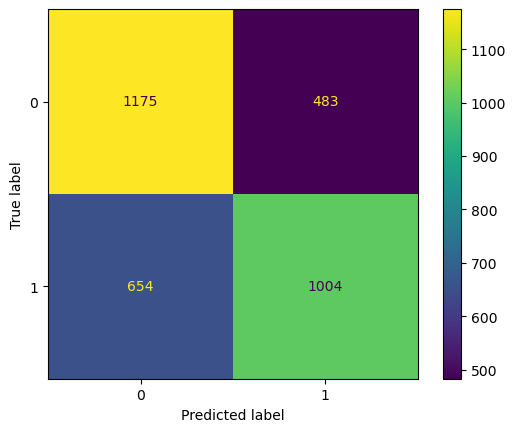

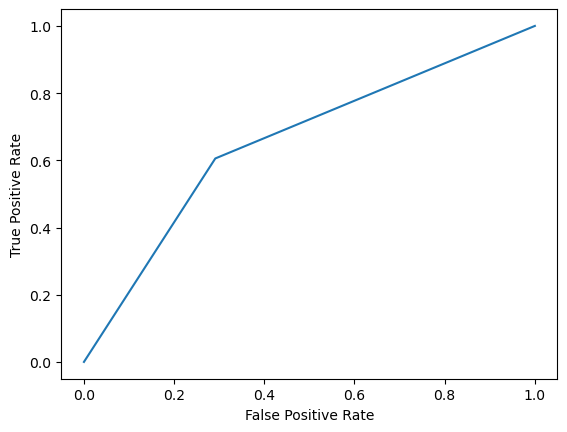



Logistic Regressor AUC score: 0.6571170084439084


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Decision Tree Model Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1658
           1       0.75      0.80      0.77      1658

    accuracy                           0.77      3316
   macro avg       0.77      0.77      0.77      3316
weighted avg       0.77      0.77      0.77      3316
 

Decision Tree Confusion Matrix: 
       0     1
0  1213   445
1   331  1327 



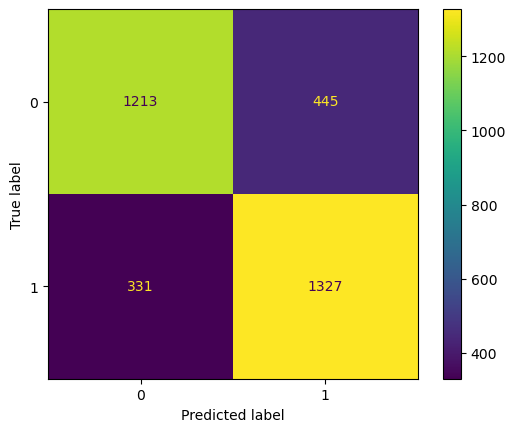

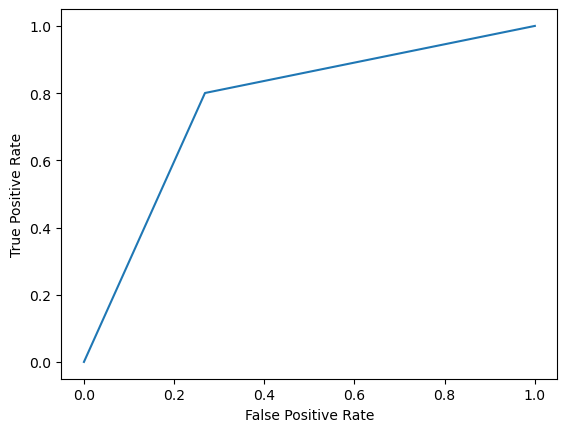



Decision Tree AUC score: 0.7659831121833535


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Random Forest Model Classification Report 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1658
           1       0.83      0.79      0.81      1658

    accuracy                           0.81      3316
   macro avg       0.81      0.81      0.81      3316
weighted avg       0.81      0.81      0.81      3316
 

Random Forest Confusion Matrix: 
       0     1
0  1388   270
1   348  1310 



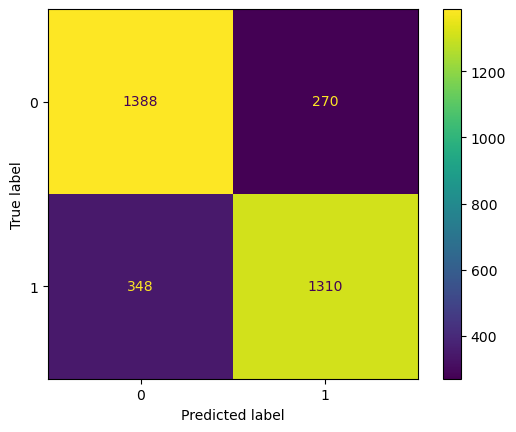

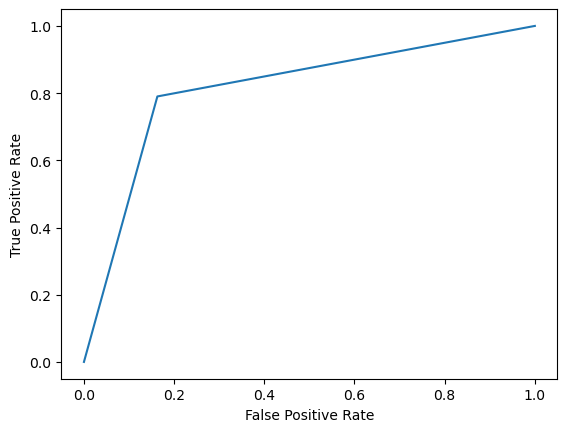



Random Forest AUC score: 0.8136308805790109


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.79      0.86      0.83      1658
           1       0.85      0.78      0.81      1658

    accuracy                           0.82      3316
   macro avg       0.82      0.82      0.82      3316
weighted avg       0.82      0.82      0.82      3316
 

XGBoost Confusion Matrix: 
       0     1
0  1428   230
1   373  1285 



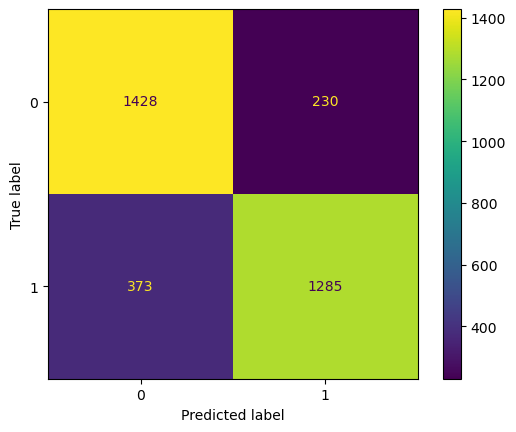

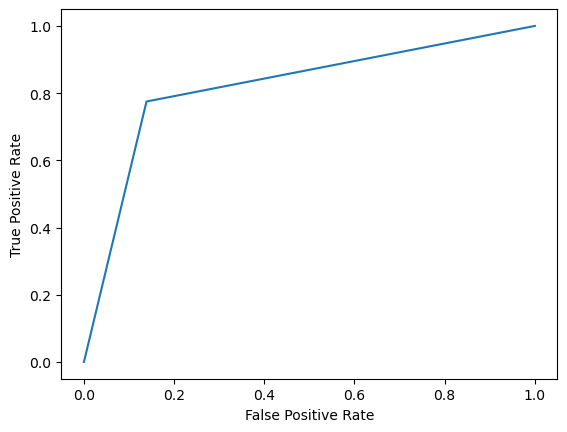



XGBoost AUC score: 0.8181544028950543


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Learning rate set to 0.024679
0:	learn: 0.6786875	total: 171ms	remaining: 2m 50s
100:	learn: 0.4683385	total: 2.23s	remaining: 19.9s
200:	learn: 0.4357294	total: 4.59s	remaining: 18.3s
300:	learn: 0.4171304	total: 6.44s	remaining: 15s
400:	learn: 0.3999295	total: 8.08s	remaining: 12.1s
500:	learn: 0.3846297	total: 9.91s	remaining: 9.87s
600:	learn: 0.3722118	total: 11.7s	remaining: 7.8s
700:	learn: 0.3609185	total: 13.2s	remaining: 5.65s
800:	learn: 0.3515386	total: 15s	remaining: 3.73s
900:	learn: 0.3430796	total: 16.8s	remaining: 1.85s
999:	learn: 0.3354195	total: 19s	remaining: 0us
CatBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82      1658
           1       0.86      0.75      0.80      1658

    accuracy 

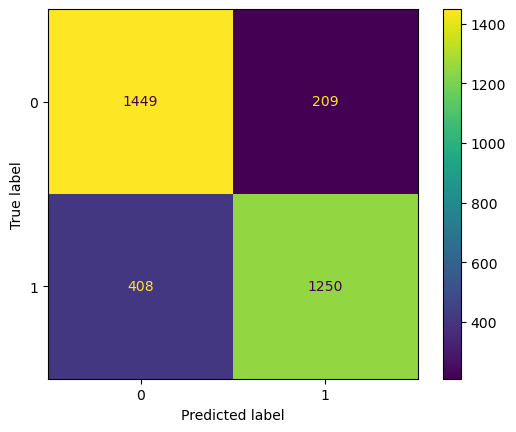

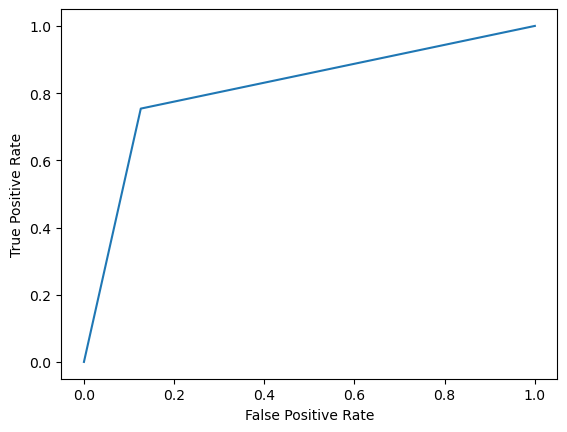



CatBoost AUC score: 0.8139324487334137


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.78      0.86      0.82      1658
           1       0.85      0.76      0.80      1658

    accuracy                           0.81      3316
   macro avg       0.81      0.81      0.81      3316
weighted avg       0.81      0.81      0.81      3316
 

LightGBM Confusion Matrix: 
       0     1
0  1427   231
1   398  1260 



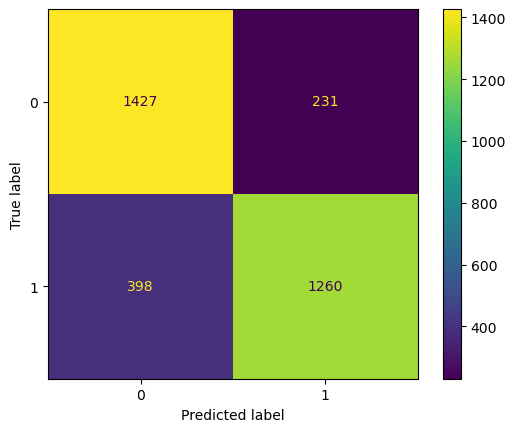

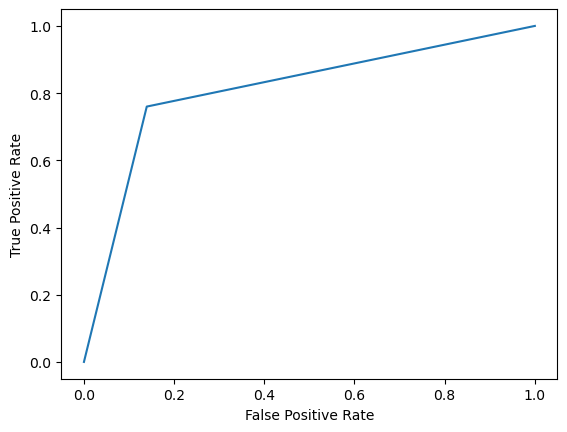



LightGBM AUC score: 0.8103136308805791


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




precision    recall  f1_score  accuracy       auc
model                                                                
XGBoost              0.848185  0.775030  0.809959  0.818154  0.818154
CatBoost             0.856751  0.753920  0.802053  0.813932  0.813932
Random Forest        0.829114  0.790109  0.809141  0.813631  0.813631
LightGBM             0.845070  0.759952  0.800254  0.810314  0.810314
Decision Tree        0.748871  0.800362  0.773761  0.765983  0.765983
Logistic Regressor   0.675185  0.605549  0.638474  0.657117  0.657117

In [33]:
# Fit and evaluate the models
model_performances = classification_fit_and_score(smote_models)
model_performances

Since the *XGBoost* model has the highest AUC score, it will be used for prediction on the test data.

In [34]:
# Finalize the XGBoost Model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=24, ...)

## 6.0 Evaluation on Test Data

In [35]:
# Import test data and submission sample
test_df =  pd.read_csv("data/test_data.csv")
test_df.head()

Customer Id  YearOfObservation  Insured_Period  Residential  \
0      H11920               2013        1.000000            0   
1      H11921               2016        0.997268            0   
2       H9805               2013        0.369863            0   
3       H7493               2014        1.000000            0   
4       H7494               2016        1.000000            0   

  Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                V               N      O          R               300.0   
1                V               N      O          R               300.0   
2                V               V      V          U               790.0   
3                V               N      O          R              1405.0   
4                V               N      O          R              1405.0   

   Building_Type  Date_of_Occupancy NumberOfWindows Geo_Code  
0              1             1960.0               3     3310  
1              1             1960.0               3     3310  
2              1             1960.0               .     3310  
3              1             2004.0               3     3321  
4              1             2004.0               3     3321

In [36]:
# Check the shape of the test data
test_df.shape

(3069, 13)

In [37]:
# Check the info of the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [38]:
# Drop the columns that were not used
test_df.drop(columns = ["Customer Id", "Geo_Code"], inplace=True)

In [39]:
# Clean the Number of Windows column
# Replace the ">=10" values
test_df["NumberOfWindows"].replace(">=10", 10, inplace= True)

# Replace the "   ." values
test_df["NumberOfWindows"].replace("   .", 4, inplace= True)
test_df["NumberOfWindows"] = test_df["NumberOfWindows"].apply(int)

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   3069 non-null   int64  
 1   Insured_Period      3069 non-null   float64
 2   Residential         3069 non-null   int64  
 3   Building_Painted    3069 non-null   object 
 4   Building_Fenced     3069 non-null   object 
 5   Garden              3065 non-null   object 
 6   Settlement          3069 non-null   object 
 7   Building Dimension  3056 non-null   float64
 8   Building_Type       3069 non-null   int64  
 9   Date_of_Occupancy   2341 non-null   float64
 10  NumberOfWindows     3069 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 263.9+ KB


In [41]:
test_df["Date_of_Occupancy"].unique()

array([1960., 2004., 1988.,   nan, 1980., 2005., 2006., 1974., 1984.,
       1977., 1850., 1973., 1998., 1968., 1900., 1931., 1950., 2001.,
       1975., 1972., 1930., 1920., 1971., 1890., 1945., 1970., 1989.,
       1979., 1955., 1922., 1910., 1940., 1994., 1990., 1965., 1995.,
       1956., 1856., 1957., 2002., 1954., 1982., 1981., 2003., 1993.,
       1953., 2007., 1999., 2008., 1958., 2000., 1951., 1962., 2012.,
       1996., 1961., 1925., 1928., 1820., 1870., 1875., 1895., 1987.,
       1985., 1991., 1903., 1934., 1983., 1963., 1935., 1800., 1884.,
       2011., 1803., 1976., 1967., 1906., 1978., 1854., 1948., 1964.,
       1992., 1750., 1938., 1997., 1913., 1932., 1986., 1959., 1905.])

In [42]:
# Fill the missing values
test_df["Building Dimension"] = bd_imputer.transform(test_df["Building Dimension"].values.reshape(-1,1))[:,0]
test_df["Date_of_Occupancy"].replace("O", 1970.0, inplace=True)
test_df["Date_of_Occupancy"].fillna(1970.0, inplace=True)
test_df["Garden"] = do_imputer.transform(test_df["Garden"].values.reshape(-1,1))[:,0]

In [43]:
# Define the list of numeric columns
numerics = [column for column in test_df.columns if (test_df[column].dtype != "O")]
numerics

['YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building Dimension',
 'Building_Type',
 'Date_of_Occupancy',
 'NumberOfWindows']

In [44]:
# Define the list of categorical columns
categoricals = [column for column in test_df.columns if (test_df[column].dtype == "O")]
categoricals

['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement']

In [45]:
# Encode the categorical columns
encoded_test_categoricals = encoder.transform(test_df[categoricals])
encoded_test_categoricals = pd.DataFrame(encoded_test_categoricals, columns = encoder.get_feature_names_out().tolist())

# Add the encoded categoricals to the DataFrame and dropping the original columns
test_df = test_df.join(encoded_test_categoricals)
test_df.drop(columns= categoricals, inplace= True)
test_df

YearOfObservation  Insured_Period  Residential  Building Dimension  \
0                  2013        1.000000            0               300.0   
1                  2016        0.997268            0               300.0   
2                  2013        0.369863            0               790.0   
3                  2014        1.000000            0              1405.0   
4                  2016        1.000000            0              1405.0   
...                 ...             ...          ...                 ...   
3064               2015        1.000000            0              1083.0   
3065               2012        1.000000            0              1083.0   
3066               2012        1.000000            0              1083.0   
3067               2013        1.000000            0              1083.0   
3068               2012        1.000000            0              1083.0   

      Building_Type  Date_of_Occupancy  NumberOfWindows  Building_Painted_V  \
0                 1             1960.0                3                 1.0   
1                 1             1960.0                3                 1.0   
2                 1             1960.0                4                 1.0   
3                 1             2004.0                3                 1.0   
4                 1             2004.0                3                 1.0   
...             ...                ...              ...                 ...   
3064              4             1900.0                4                 1.0   
3065              2             1948.0                4                 1.0   
3066              2             1993.0                4                 1.0   
3067              1             1800.0                4                 1.0   
3068              2             1950.0                4                 1.0   

      Building_Fenced_V  Garden_V  Settlement_U  
0                   0.0       0.0           0.0  
1                   0.0       0.0           0.0  
2                   1.0       1.0           1.0  
3                   0.0       0.0           0.0  
4                   0.0       0.0           0.0  
...                 ...       ...           ...  
3064                1.0       1.0           1.0  
3065                1.0       1.0           1.0  
3066                1.0       1.0           1.0  
3067                1.0       1.0           1.0  
3068                1.0       1.0           1.0  

[3069 rows x 11 columns]

In [46]:
# # Create a column for the target variable
# test_df["Claim"] = 0

In [47]:
# Scale the numeric columns
test_df[numerics] = scaler.transform(test_df[numerics])

In [48]:
# Predict on the unseen data - XGBoost model
test_df["Claim"] = xgb_model.predict(test_df)
test_df

YearOfObservation  Insured_Period  Residential  Building Dimension  \
0                  0.25        1.000000          0.0            0.014280   
1                  1.00        0.997268          0.0            0.014280   
2                  0.25        0.369863          0.0            0.037681   
3                  0.50        1.000000          0.0            0.067052   
4                  1.00        1.000000          0.0            0.067052   
...                 ...             ...          ...                 ...   
3064               0.75        1.000000          0.0            0.051674   
3065               0.00        1.000000          0.0            0.051674   
3066               0.00        1.000000          0.0            0.051674   
3067               0.25        1.000000          0.0            0.051674   
3068               0.00        1.000000          0.0            0.051674   

      Building_Type  Date_of_Occupancy  NumberOfWindows  Building_Painted_V  \
0          0.000000           0.865385         0.222222                 1.0   
1          0.000000           0.865385         0.222222                 1.0   
2          0.000000           0.865385         0.333333                 1.0   
3          0.000000           0.971154         0.222222                 1.0   
4          0.000000           0.971154         0.222222                 1.0   
...             ...                ...              ...                 ...   
3064       1.000000           0.721154         0.333333                 1.0   
3065       0.333333           0.836538         0.333333                 1.0   
3066       0.333333           0.944712         0.333333                 1.0   
3067       0.000000           0.480769         0.333333                 1.0   
3068       0.333333           0.841346         0.333333                 1.0   

      Building_Fenced_V  Garden_V  Settlement_U  Claim  
0                   0.0       0.0           0.0      0  
1                   0.0       0.0           0.0      0  
2                   1.0       1.0           1.0      0  
3                   0.0       0.0           0.0      0  
4                   0.0       0.0           0.0      0  
...                 ...       ...           ...    ...  
3064                1.0       1.0           1.0      0  
3065                1.0       1.0           1.0      1  
3066                1.0       1.0           1.0      0  
3067                1.0       1.0           1.0      1  
3068                1.0       1.0           1.0      0  

[3069 rows x 12 columns]

## 7.0 Conclusion

## 8.0 Exporting

Per their confusion matrices, the Decision Tree model and the XGBoost model tie on the performance metrics. As a personal decision, the XGBoost is recommended for further optimization and deployment.

In [49]:
# Exporting the requirements
requirements = "\n".join(f"{m.__name__}=={m.__version__}" for m in globals().values() if getattr(m, "__version__", None))

with open("requirements.txt", "w") as f:
    f.write(requirements)

In [50]:
# Creating a dictionary of objects to export
exports = {"encoder": encoder,
           "scaler": scaler,
           "model": xgb_model}

In [51]:
# Exporting the dictionary with Pickle
with open("src/Streamlit_toolkit", "wb") as file:
    pickle.dump(exports, file)

In [52]:
# Exporting the model
xgb_model.save_model("src/xgb_model.json")